In [1]:
import pandas as pd
import os

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

## Generation timeseries 
- Imports timeseries for different timeframes
- Converts str into numeric dataframe

In [2]:
cwd = os.getcwd()
# generation_2018_path = os.path.join(cwd, "generation-20180101-20180401.csv")
# generation_2019_path = os.path.join(cwd, "generation-20190101-20190401.csv")
# generation_2020_path = os.path.join(cwd, "generation-20200101-20200401.csv")
# generation_2021_path = os.path.join(cwd, "generation-20210101-20210401.csv")
# generation_2022_path = os.path.join(cwd, "generation-20220101-20220401.csv")

generation_2018_path = os.path.join(cwd, "generation-20180101-20190101.csv")
generation_2019_path = os.path.join(cwd, "generation-20190101-20200101.csv")
generation_2020_path = os.path.join(cwd, "generation-20200101-20210101.csv")
generation_2021_path = os.path.join(cwd, "generation-20210101-20220101.csv")
generation_2021_path_AT = os.path.join(cwd, "generation-20210101-20220101-AT.csv")
generation_2021_path_DE_50HZ = os.path.join(cwd, "generation-20210101-20220101-DE_50HZ.csv")
generation_2021_path_DE_AMPRION = os.path.join(cwd, "generation-20210101-20220101-DE_AMPRION.csv")
generation_2021_path_DE_TENNET = os.path.join(cwd, "generation-20210101-20220101-DE_TENNET.csv")
generation_2021_path_FI = os.path.join(cwd, "generation-20210101-20220101-FI.csv")
generation_2021_path_SE = os.path.join(cwd, "generation-20210101-20220101-SE.csv")
generation_2022_path = os.path.join(cwd, "generation-20220101-20220401.csv")
generation_2022_path_AT = os.path.join(cwd, "generation-20220101-20220401-AT.csv")
generation_2022_path_DE_50HZ = os.path.join(cwd, "generation-20220101-20220401-DE_50HZ.csv")
generation_2022_path_DE_AMPRION = os.path.join(cwd, "generation-20220101-20220401-DE_AMPRION.csv")
generation_2022_path_DE_TENNET = os.path.join(cwd, "generation-20220101-20220401-DE_TENNET.csv")
generation_2022_path_FI = os.path.join(cwd, "generation-20220101-20220401-FI.csv")
generation_2022_path_SE = os.path.join(cwd, "generation-20220101-20220401-SE.csv")
generation_t1_path = os.path.join(cwd, "generation_gas_germany_2019.csv")

generation_2018 = pd.read_csv(generation_2018_path, index_col=0)
generation_2019 = pd.read_csv(generation_2019_path, index_col=0)
generation_2020 = pd.read_csv(generation_2020_path, index_col=0)
generation_2021 = pd.read_csv(generation_2021_path, index_col=0)
generation_2021_AT = pd.read_csv(generation_2021_path_AT, index_col=0)
generation_2021_DE_50HZ = pd.read_csv(generation_2021_path_DE_50HZ, index_col=0)
generation_2021_DE_AMPRION = pd.read_csv(generation_2021_path_DE_AMPRION, index_col=0)
generation_2021_DE_TENNET = pd.read_csv(generation_2021_path_DE_TENNET, index_col=0)
generation_2021_FI = pd.read_csv(generation_2021_path_FI, index_col=0)
generation_2021_SE = pd.read_csv(generation_2021_path_SE, index_col=0)
generation_2022 = pd.read_csv(generation_2022_path, index_col=0)
generation_2022_AT = pd.read_csv(generation_2022_path_AT, index_col=0)
generation_2022_DE_50HZ = pd.read_csv(generation_2022_path_DE_50HZ, index_col=0)
generation_2022_DE_AMPRION = pd.read_csv(generation_2022_path_DE_AMPRION, index_col=0)
generation_2022_DE_TENNET = pd.read_csv(generation_2022_path_DE_TENNET, index_col=0)
generation_2022_FI = pd.read_csv(generation_2022_path_FI, index_col=0)
generation_2022_SE = pd.read_csv(generation_2022_path_SE, index_col=0)
generation_t1 = pd.read_csv(generation_t1_path, index_col=0)

/tmp/ipykernel_9066/329132945.py:27: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70) have mixed types. Specify dtype option on import or set low_memory=False.
  generation_2018 = pd.read_csv(generation_2018_path, index_col=0)
/tmp/ipykernel_9066/329132945.py:28: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  generation_2019 = pd.read_csv(generation_2019_path, index_col=0)
/tmp/ipykernel_9066/329132945.py:29: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44

In [16]:
generation_2018 = generation_2018.iloc[2:,:]
generation_2018 = generation_2018.apply(pd.to_numeric)
generation_2018.index = pd.to_datetime(generation_2018.index, utc=True)

generation_2019 = generation_2019.iloc[2:,:]
generation_2019 = generation_2019.apply(pd.to_numeric)
generation_2019.index = pd.to_datetime(generation_2019.index, utc=True)

generation_2020 = generation_2020.iloc[2:,:]
generation_2020 = generation_2020.apply(pd.to_numeric)
generation_2020.index = pd.to_datetime(generation_2020.index, utc=True)

generation_2021 = generation_2021.iloc[2:,:]
generation_2021 = generation_2021.apply(pd.to_numeric)
generation_2021.index = pd.to_datetime(generation_2021.index, utc=True)
generation_2021_AT = generation_2021_AT.iloc[2:,:]
generation_2021_AT = generation_2021_AT.apply(pd.to_numeric)
generation_2021_DE_50HZ = generation_2021_DE_50HZ.iloc[2:,:]
generation_2021_DE_50HZ = generation_2021_DE_50HZ.apply(pd.to_numeric)
generation_2021_DE_AMPRION = generation_2021_DE_AMPRION.iloc[2:,:]
generation_2021_DE_AMPRION = generation_2021_DE_AMPRION.apply(pd.to_numeric)
generation_2021_DE_TENNET = generation_2021_DE_TENNET.iloc[2:,:]
generation_2021_DE_TENNET = generation_2021_DE_TENNET.apply(pd.to_numeric)
generation_2021_FI = generation_2021_FI.iloc[2:,:]
generation_2021_FI = generation_2021_FI.apply(pd.to_numeric)
generation_2021_SE = generation_2021_SE.iloc[2:,:]
generation_2021_SE = generation_2021_SE.apply(pd.to_numeric)


generation_2022 = generation_2022.iloc[2:,:]
generation_2022 = generation_2022.apply(pd.to_numeric)
generation_2022.index = pd.to_datetime(generation_2022.index, utc=True)
generation_2022_AT = generation_2022_AT.iloc[2:,:]
generation_2022_AT = generation_2022_AT.apply(pd.to_numeric)
generation_2022_DE_50HZ = generation_2022_DE_50HZ.iloc[2:,:]
generation_2022_DE_50HZ = generation_2022_DE_50HZ.apply(pd.to_numeric)
generation_2022_DE_AMPRION = generation_2022_DE_AMPRION.iloc[2:,:]
generation_2022_DE_AMPRION = generation_2022_DE_AMPRION.apply(pd.to_numeric)
generation_2022_DE_TENNET = generation_2022_DE_TENNET.iloc[2:,:]
generation_2022_DE_TENNET = generation_2022_DE_TENNET.apply(pd.to_numeric)
generation_2022_FI = generation_2022_FI.iloc[2:,:]
generation_2022_FI = generation_2022_FI.apply(pd.to_numeric)
generation_2022_SE = generation_2022_SE.iloc[2:,:]
generation_2022_SE = generation_2022_SE.apply(pd.to_numeric)

In [50]:
import numpy as np

option = "_DE_TENNET"

genstats2018 = pd.DataFrame(generation_2018.loc["2018-01-01 00:00:00+00:00":"2018-04-01 00:00:00+00:00"].sum().describe()).rename(columns={0:2018}).T
genstats2018["sum_Jan-April_[TWh]"] = generation_2018.loc["2018-01-01 00:00:00+00:00":"2018-04-01 00:00:00+00:00"].sum().sum()/1e+6
genstats2018["sum_total_[TWh]"] = generation_2018.sum().sum()/1e+6
genstats2019 = pd.DataFrame(generation_2019.loc["2019-01-01 00:00:00+00:00":"2019-04-01 00:00:00+00:00"].sum().describe()).rename(columns={0:2019}).T
genstats2019["sum_Jan-April_[TWh]"] = generation_2019.loc["2019-01-01 00:00:00+00:00":"2019-04-01 00:00:00+00:00"].sum().sum()/1e+6
genstats2019["sum_total_[TWh]"] = generation_2019.sum().sum()/1e+6
genstats2020 = pd.DataFrame(generation_2020.loc["2020-01-01 00:00:00+00:00":"2020-04-01 00:00:00+00:00"].sum().describe()).rename(columns={0:2020}).T
genstats2020["sum_Jan-April_[TWh]"] = generation_2020.loc["2020-01-01 00:00:00+00:00":"2020-04-01 00:00:00+00:00"].sum().sum()/1e+6
genstats2020["sum_total_[TWh]"] = generation_2020.sum().sum()/1e+6
genstats2021 = pd.DataFrame(eval(f"generation_2021{option}").loc["2021-01-01 00:00:00+00:00":"2021-04-01 00:00:00+00:00"].sum().describe()).rename(columns={0:2021}).T
genstats2021["sum_Jan-April_[TWh]"] = eval(f"generation_2021{option}").loc["2021-01-01 00:00:00+00:00":"2021-04-01 00:00:00+00:00"].sum().sum()/1e+6
genstats2021["sum_total_[TWh]"] = eval(f"generation_2021{option}").sum().sum()/1e+6
genstats2022 = pd.DataFrame(eval(f"generation_2022{option}").loc["2022-01-01 00:00:00+00:00":"2022-04-01 00:00:00+00:00"].sum().describe()).rename(columns={0:2022}).T
genstats2022["sum_Jan-April_[TWh]"] = eval(f"generation_2022{option}").loc["2022-01-01 00:00:00+00:00":"2022-04-01 00:00:00+00:00"].sum().sum()/1e+6
genstats2022["sum_total_[TWh]"] = eval(f"generation_2022{option}").sum().sum()/1e+6

genstats = pd.concat([genstats2018,genstats2019,genstats2020,genstats2021,genstats2022])

print(genstats.iloc[-2:, [0,1,8,9]].to_markdown())

|      |   count |   mean |   sum_Jan-April_[TWh] |   sum_total_[TWh] |
|-----:|--------:|-------:|----------------------:|------------------:|
| 2021 |      69 | 260974 |               18.0072 |           47.6137 |
| 2022 |      65 | 215735 |               14.0228 |           14.0228 |


# Heat demand plot

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

temperature_path = os.path.join(cwd, "europe-2018.nc")
temperature2018 = xr.open_dataset(temperature_path)
temperature_path = os.path.join(cwd, "europe-2019.nc")
temperature2019 = xr.open_dataset(temperature_path)
temperature_path = os.path.join(cwd, "europe-2020.nc")
temperature2020 = xr.open_dataset(temperature_path)
temperature_path = os.path.join(cwd, "europe-2021.nc")
temperature2021 = xr.open_dataset(temperature_path)
temperature_path = os.path.join(cwd, "europe-2022.nc")
temperature2022 = xr.open_dataset(temperature_path)

plt.figure(figsize=(10,3))
ax1 = plt.subplot()

#l2, = ax2.plot(acceleration, color='orange')

#plt.legend([l1, l2], ["speed", "acceleration"])
((temperature2018["temperature"].sel(y=52.5, x=13.5)-273)).rolling(time=7*24,center=True,min_periods=1).mean().plot(ax=ax1, color="orange")   #Berlin lat/lon
ax2 = ax1.twinx()
ax2.plot(generation_2018.sum(axis=1).rolling(7*24,center=True,min_periods=1).mean(),color="blue",alpha=0.7)


((temperature2019["temperature"].sel(y=52.5, x=13.5)-273)).rolling(time=7*24,center=True,min_periods=1).mean().plot(ax=ax1, color="orange")   #Berlin lat/lon
ax2.plot(generation_2019.sum(axis=1).rolling(7*24,center=True,min_periods=1).mean(), color="blue", alpha=0.7)

((temperature2020["temperature"].sel(y=52.5, x=13.5)-273)).rolling(time=7*24,center=True,min_periods=1).mean().plot(ax=ax1, color="orange")   #Berlin lat/lon
ax2.plot(generation_2020.sum(axis=1).rolling(7*24,center=True,min_periods=1).mean(), color="blue", alpha=0.7)

((temperature2021["temperature"].sel(y=52.5, x=13.5)-273)).rolling(time=7*24,center=True,min_periods=1).mean().plot(ax=ax1, color="orange")   #Berlin lat/lon
ax2.plot(generation_2021.sum(axis=1).rolling(7*24,center=True,min_periods=1).mean(), color="blue", alpha=0.7)

((temperature2022["temperature"].sel(y=52.5, x=13.5).sum(axis=1)-273)).rolling(time=24*7, center=True, min_periods=1).mean().plot(ax=ax1, color="orange")   #Berlin lat/lon
ax2.plot(generation_2022.sum(axis=1).rolling(7*24,center=True,min_periods=1).mean(), color="blue", alpha=0.7)


ax1.set_ylabel("Temperature [C], Berlin")
ax2.set_ylabel("CHP generation in DE, AT, SE, FI")
ax1.set_title("Correlation between Temperature and CHP generation in 2018-2022, Europe")


orange_patch = mpatches.Patch(color='orange', label='Daily average temperature')
blue_patch = mpatches.Patch(color='blue', label='CHP generation')

plt.legend(handles=[orange_patch, blue_patch])

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

temperature_path = os.path.join(cwd, "europe-2018.nc")
temperature2018 = xr.open_dataset(temperature_path)
temperature_path = os.path.join(cwd, "europe-2019.nc")
temperature2019 = xr.open_dataset(temperature_path)
temperature_path = os.path.join(cwd, "europe-2020.nc")
temperature2020 = xr.open_dataset(temperature_path)
temperature_path = os.path.join(cwd, "europe-2021.nc")
temperature2021 = xr.open_dataset(temperature_path)
temperature_path = os.path.join(cwd, "europe-2022.nc")
temperature2022 = xr.open_dataset(temperature_path)

plt.figure(figsize=(10,3))
ax1 = plt.subplot()

#l2, = ax2.plot(acceleration, color='orange')

#plt.legend([l1, l2], ["speed", "acceleration"])
((temperature2018["temperature"].sel(y=52.5, x=13.5)-273)).rolling(time=7*24,center=True,min_periods=1).mean().plot(ax=ax1, color="orange")   #Berlin lat/lon
ax2 = ax1.twinx()
ax2.plot(generation_2018.loc[:,"HKW Mitte GUD"].rolling(7*24,center=True,min_periods=1).mean(),color="blue",alpha=0.7)


((temperature2019["temperature"].sel(y=52.5, x=13.5)-273)).rolling(time=7*24,center=True,min_periods=1).mean().plot(ax=ax1, color="orange")   #Berlin lat/lon
ax2.plot(generation_2019.loc[:,"HKW Mitte GUD"].rolling(7*24,center=True,min_periods=1).mean(), color="blue", alpha=0.7)

((temperature2020["temperature"].sel(y=52.5, x=13.5)-273)).rolling(time=7*24,center=True,min_periods=1).mean().plot(ax=ax1, color="orange")   #Berlin lat/lon
ax2.plot(generation_2020.loc[:,"HKW Mitte GUD"].rolling(7*24,center=True,min_periods=1).mean(), color="blue", alpha=0.7)

((temperature2021["temperature"].sel(y=52.5, x=13.5)-273)).rolling(time=7*24,center=True,min_periods=1).mean().plot(ax=ax1, color="orange")   #Berlin lat/lon
ax2.plot(generation_2021.loc[:,"HKW Mitte GUD"].rolling(7*24,center=True,min_periods=1).mean(), color="blue", alpha=0.7)

((temperature2022["temperature"].sel(y=52.5, x=13.5).sum(axis=1)-273)).rolling(time=24*7, center=True, min_periods=1).mean().plot(ax=ax1, color="orange")   #Berlin lat/lon
ax2.plot(generation_2022.loc[:,"HKW Mitte GUD"].rolling(7*24,center=True,min_periods=1).mean(), color="blue", alpha=0.7)


ax1.set_ylabel("Temperature [C], Berlin")
ax2.set_ylabel("CHP generation [MW]")
ax1.set_title("Correlation between Temperature and CHP generation in 2018-2022, Berlin HKW Mitte")


orange_patch = mpatches.Patch(color='orange', label='Daily average temperature')
blue_patch = mpatches.Patch(color='blue', label='CHP generation')

plt.legend(handles=[orange_patch, blue_patch])

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

temperature_path = os.path.join(cwd, "europe-2018.nc")
temperature2018 = xr.open_dataset(temperature_path)
temperature_path = os.path.join(cwd, "europe-2019.nc")
temperature2019 = xr.open_dataset(temperature_path)
temperature_path = os.path.join(cwd, "europe-2020.nc")
temperature2020 = xr.open_dataset(temperature_path)
temperature_path = os.path.join(cwd, "europe-2021.nc")
temperature2021 = xr.open_dataset(temperature_path)
temperature_path = os.path.join(cwd, "europe-2022.nc")
temperature2022 = xr.open_dataset(temperature_path)

plt.figure(figsize=(10,3))
ax1 = plt.subplot()

#l2, = ax2.plot(acceleration, color='orange')

#plt.legend([l1, l2], ["speed", "acceleration"])
((temperature2018["temperature"].sel(y=51, x=6.5)-273)).rolling(time=7*24,center=True,min_periods=1).mean().plot(ax=ax1, color="orange")   #Berlin lat/lon
ax2 = ax1.twinx()
ax2.plot(generation_2018.loc[:,"GuD Dormagen"].rolling(7*24,center=True,min_periods=1).mean(),color="blue",alpha=0.7)


((temperature2019["temperature"].sel(y=51, x=6.5)-273)).rolling(time=7*24,center=True,min_periods=1).mean().plot(ax=ax1, color="orange")   #Berlin lat/lon
ax2.plot(generation_2019.loc[:,"GuD Dormagen"].rolling(7*24,center=True,min_periods=1).mean(), color="blue", alpha=0.7)

((temperature2020["temperature"].sel(y=51, x=6.5)-273)).rolling(time=7*24,center=True,min_periods=1).mean().plot(ax=ax1, color="orange")   #Berlin lat/lon
ax2.plot(generation_2020.loc[:,"GuD Dormagen"].rolling(7*24,center=True,min_periods=1).mean(), color="blue", alpha=0.7)

((temperature2021["temperature"].sel(y=51, x=6.5)-273)).rolling(time=7*24,center=True,min_periods=1).mean().plot(ax=ax1, color="orange")   #Berlin lat/lon
ax2.plot(generation_2021.loc[:,"GuD Dormagen"].rolling(7*24,center=True,min_periods=1).mean(), color="blue", alpha=0.7)

((temperature2022["temperature"].sel(y=51, x=6.5).sum(axis=1)-273)).rolling(time=24*7, center=True, min_periods=1).mean().plot(ax=ax1, color="orange")   #Berlin lat/lon
ax2.plot(generation_2022.loc[:,"GuD Dormagen"].rolling(7*24,center=True,min_periods=1).mean(), color="blue", alpha=0.7)


ax1.set_ylabel("Temperature [C], NRW")
ax2.set_ylabel("CHP generation [MW]")
ax1.set_title("Correlation between Temperature and CHP generation in 2018-2022, NRW Bayer Chempark")


orange_patch = mpatches.Patch(color='orange', label='Daily average temperature')
blue_patch = mpatches.Patch(color='blue', label='CHP generation')

plt.legend(handles=[orange_patch, blue_patch])

# Plot A

In [5]:
# ILLUSTRATION THAT AGGREGATES the CHP FLEET
df2018 = pd.DataFrame(generation_2018.sum(axis=1).values)
df2018["year"] = pd.DatetimeIndex(generation_2018.index.values).year
xlabel = pd.DataFrame({'snapshot':pd.date_range("2019-01-01", periods=len(generation_2020), freq="H")})
df2018["time"] = xlabel.snapshot.dt.strftime('%d-%B %H:00')

df2019 = pd.DataFrame(generation_2019.sum(axis=1).values)
df2019["year"] = pd.DatetimeIndex(generation_2019.index.values).year
xlabel = pd.DataFrame({'snapshot':pd.date_range("2019-01-01", periods=len(generation_2020), freq="H")})
df2019["time"] = xlabel.snapshot.dt.strftime('%d-%B %H:00')

df2020 = pd.DataFrame(generation_2020.sum(axis=1).values)
df2020["year"] = pd.DatetimeIndex(generation_2020.index.values).year
xlabel = pd.DataFrame({'snapshot':pd.date_range("2019-01-01", periods=len(generation_2020), freq="H")})
df2020["time"] = xlabel.snapshot.dt.strftime('%d-%B %H:00')

df2021 = pd.DataFrame(generation_2021.sum(axis=1).values)
df2021["year"] = pd.DatetimeIndex(generation_2021.index.values).year
xlabel = pd.DataFrame({'snapshot':pd.date_range("2019-01-01", periods=len(generation_2020), freq="H")})
df2021["time"] = xlabel.snapshot.dt.strftime('%d-%B %H:00')

df2022 = pd.DataFrame(generation_2022.sum(axis=1).values)
df2022["year"] = pd.DatetimeIndex(generation_2022.index.values).year
xlabel = pd.DataFrame({'snapshot':pd.date_range("2019-01-01", periods=len(generation_2020), freq="H")})
df2022["time"] = xlabel.snapshot.dt.strftime('%d-%B %H:00')


frames = [df2018, df2019, df2020, df2021, df2022]
df_total = pd.concat(frames).rename(columns={0:"p"})
df_total = df_total.reset_index().rename(columns={"index":"snapshot"})
df_total["p"] = df_total["p"].rolling(24*7,center=True,min_periods=1).mean()/1000  # 1 week smoothing and GW conversion

(0.0, 8783.0)

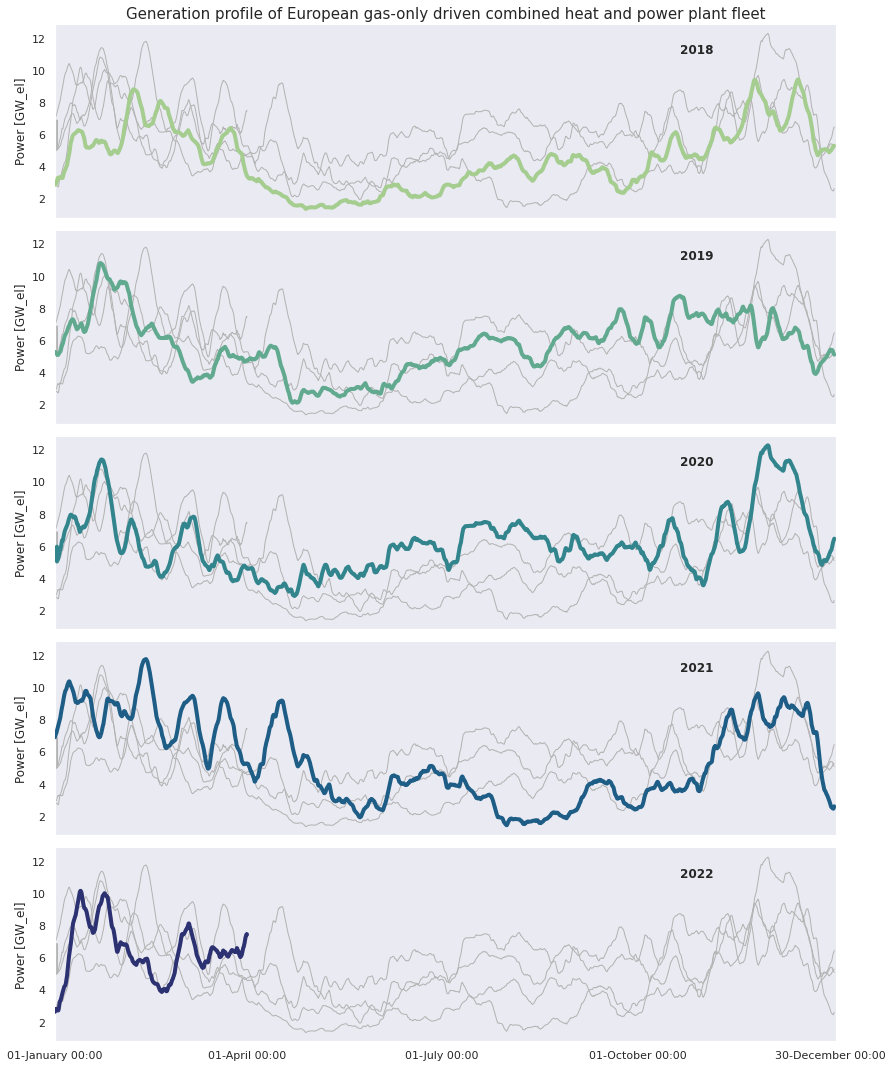

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")


# Plot each year's time series in its own facet
g = sns.relplot(
    data=df_total,
    x="time", y="p", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=1, height=3, aspect=4, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    if year == 2018:
        ax.set_title("Generation profile of European gas-only driven combined heat and power plant fleet", fontsize=15)
    else:
        ax.set_title("")
    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=df_total, x="time", y="p", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ticks = [
df_total[df_total["time"]=="01-January 00:00"].index[0],
df_total[df_total["time"]=="01-April 00:00"].index[0],
df_total[df_total["time"]=="01-July 00:00"].index[0],
df_total[df_total["time"]=="01-October 00:00"].index[0],
df_total[df_total["time"]=="30-December 00:00"].index[0],
]
ax.set_xticks(ticks)

# Tweak the supporting aspects of the plot

g.set_axis_labels("", "Power [GW_el]")
g.tight_layout()
plt.xlim([0, len(generation_2020)])



# Plot B

In [ ]:
generation_2022_AT = generation_2022_AT.iloc[2:,:]
generation_2022_AT = generation_2022_AT.apply(pd.to_numeric)
generation_2022_DE_50HZ = generation_2022_DE_50HZ.iloc[2:,:]
generation_2022_DE_50HZ = generation_2022_DE_50HZ.apply(pd.to_numeric)
generation_2022_DE_AMPRION = generation_2022_DE_AMPRION.iloc[2:,:]
generation_2022_DE_AMPRION = generation_2022_DE_AMPRION.apply(pd.to_numeric)
generation_2022_DE_TENNET = generation_2022_DE_TENNET.iloc[2:,:]
generation_2022_DE_TENNET = generation_2022_DE_TENNET.apply(pd.to_numeric)
generation_2022_FI = generation_2022_FI.iloc[2:,:]
generation_2022_FI = generation_2022_FI.apply(pd.to_numeric)
generation_2022_SE = generation_2022_SE.iloc[2:,:]
generation_2022_SE = generation_2022_SE.apply(pd.to_numeric)

# ILLUSTRATION THAT DISAGGREGATES the CHP FLEET
df2021_AT = pd.DataFrame(generation_2022_AT.sum(axis=1).values)
df2021_AT["year"] = pd.DatetimeIndex(generation_2022_AT.sum(axis=1).index.str[:-6].values).year
xlabel = pd.DataFrame({'snapshot':pd.date_range("2020-01-01", periods=len(generation_2021_AT), freq="H")})
df2021_AT["time"] = xlabel.snapshot.dt.strftime('%d-%B %H:00')
df2022_AT = pd.DataFrame(generation_2022_AT.sum(axis=1).values)
df2022_AT["year"] = pd.DatetimeIndex(generation_2022_AT.sum(axis=1).index.str[:-6].values).year
xlabel = pd.DataFrame({'snapshot':pd.date_range("2020-01-01", periods=len(generation_2021_AT), freq="H")})
df2022_AT["time"] = xlabel.snapshot.dt.strftime('%d-%B %H:00')

df2021_DE_50HZ = pd.DataFrame(generation_2021_DE_50HZ.sum(axis=1).values)
df2021_DE_50HZ["year"] = pd.DatetimeIndex(generation_2021_DE_50HZ.sum(axis=1).index.str[:-6].values).year
xlabel = pd.DataFrame({'snapshot':pd.date_range("2020-01-01", periods=len(generation_2021_DE_50HZ), freq="H")})
df2021_DE_50HZ["time"] = xlabel.snapshot.dt.strftime('%d-%B %H:00')
df2022_DE_50HZ = pd.DataFrame(generation_2022_DE_50HZ.sum(axis=1).values)
df2022_DE_50HZ["year"] = pd.DatetimeIndex(generation_2022_DE_50HZ.sum(axis=1).index.str[:-6].values).year
xlabel = pd.DataFrame({'snapshot':pd.date_range("2020-01-01", periods=len(generation_2021_DE_50HZ), freq="H")})
df2022_DE_50HZ["time"] = xlabel.snapshot.dt.strftime('%d-%B %H:00')

df2021_DE_AMPRION = pd.DataFrame(generation_2021_DE_AMPRION.sum(axis=1).values)
df2021_DE_AMPRION["year"] = pd.DatetimeIndex(generation_2021_DE_AMPRION.sum(axis=1).index.str[:-6].values).year
xlabel = pd.DataFrame({'snapshot':pd.date_range("2020-01-01", periods=len(generation_2021_DE_AMPRION), freq="H")})
df2021_DE_AMPRION["time"] = xlabel.snapshot.dt.strftime('%d-%B %H:00')
df2022_DE_AMPRION = pd.DataFrame(generation_2022_DE_AMPRION.sum(axis=1).values)
df2022_DE_AMPRION["year"] = pd.DatetimeIndex(generation_2022_DE_AMPRION.sum(axis=1).index.str[:-6].values).year
xlabel = pd.DataFrame({'snapshot':pd.date_range("2020-01-01", periods=len(generation_2021_DE_AMPRION), freq="H")})
df2022_DE_AMPRION["time"] = xlabel.snapshot.dt.strftime('%d-%B %H:00')

df2021_DE_TENNET = pd.DataFrame(generation_2021_DE_TENNET.sum(axis=1).values)
df2021_DE_TENNET["year"] = pd.DatetimeIndex(generation_2021_DE_TENNET.sum(axis=1).index.str[:-6].values).year
xlabel = pd.DataFrame({'snapshot':pd.date_range("2020-01-01", periods=len(generation_2021_DE_TENNET), freq="H")})
df2021_DE_TENNET["time"] = xlabel.snapshot.dt.strftime('%d-%B %H:00')
df2022_DE_TENNET = pd.DataFrame(generation_2022_DE_TENNET.sum(axis=1).values)
df2022_DE_TENNET["year"] = pd.DatetimeIndex(generation_2022_DE_TENNET.sum(axis=1).index.str[:-6].values).year
xlabel = pd.DataFrame({'snapshot':pd.date_range("2020-01-01", periods=len(generation_2021_DE_TENNET), freq="H")})
df2022_DE_TENNET["time"] = xlabel.snapshot.dt.strftime('%d-%B %H:00')

df2021_FI = pd.DataFrame(generation_2021_FI.sum(axis=1).values)
df2021_FI["year"] = pd.DatetimeIndex(generation_2021_FI.sum(axis=1).index.str[:-6].values).year
xlabel = pd.DataFrame({'snapshot':pd.date_range("2020-01-01", periods=len(generation_2021_FI), freq="H")})
df2021_FI["time"] = xlabel.snapshot.dt.strftime('%d-%B %H:00')
df2022_FI = pd.DataFrame(generation_2022_FI.sum(axis=1).values)
df2022_FI["year"] = pd.DatetimeIndex(generation_2022_FI.sum(axis=1).index.str[:-6].values).year
xlabel = pd.DataFrame({'snapshot':pd.date_range("2020-01-01", periods=len(generation_2021_FI), freq="H")})
df2022_FI["time"] = xlabel.snapshot.dt.strftime('%d-%B %H:00')

df2021_SE = pd.DataFrame(generation_2021_SE.sum(axis=1).values)
df2021_SE["year"] = pd.DatetimeIndex(generation_2021_SE.sum(axis=1).index.str[:-6].values).year
xlabel = pd.DataFrame({'snapshot':pd.date_range("2020-01-01", periods=len(generation_2021_SE), freq="H")})
df2021_SE["time"] = xlabel.snapshot.dt.strftime('%d-%B %H:00')
df2022_SE = pd.DataFrame(generation_2022_SE.sum(axis=1).values)
df2022_SE["year"] = pd.DatetimeIndex(generation_2022_SE.sum(axis=1).index.str[:-6].values).year
xlabel = pd.DataFrame({'snapshot':pd.date_range("2020-01-01", periods=len(generation_2021_SE), freq="H")})
df2022_SE["time"] = xlabel.snapshot.dt.strftime('%d-%B %H:00')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

frames = [df2021_DE_50HZ, df2022_DE_50HZ]
df_total = pd.concat(frames).rename(columns={0:"p"})
df_total = df_total.reset_index().rename(columns={"index":"snapshot"})
df_total["p"] = df_total["p"].rolling(24*7,center=True,min_periods=1).mean()/1000  # 1 week smoothing and GW conversion

# Plot each year's time series in its own facet
g = sns.relplot(
    data=df_total,
    x="time", y="p", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=1, height=3, aspect=4, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    if year == 2020:
        ax.set_title("Generation profile of European gas-only driven combined heat and power plant fleet", fontsize=15)
    else:
        ax.set_title("")
    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=df_total, x="time", y="p", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ticks = [
df_total[df_total["time"]=="01-January 00:00"].index[0],
df_total[df_total["time"]=="01-April 00:00"].index[0],
df_total[df_total["time"]=="01-July 00:00"].index[0],
df_total[df_total["time"]=="01-October 00:00"].index[0],
df_total[df_total["time"]=="30-December 22:00"].index[0],
]
ax.set_xticks(ticks)

# Tweak the supporting aspects of the plot

g.set_axis_labels("", "Power [GW_el]")
g.tight_layout()
plt.xlim([0, len(generation_2021_DE_50HZ)])


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

frames = [df2021_DE_AMPRION, df2022_DE_AMPRION]
df_total = pd.concat(frames).rename(columns={0:"p"})
df_total = df_total.reset_index().rename(columns={"index":"snapshot"})
df_total["p"] = df_total["p"].rolling(24*7,center=True,min_periods=1).mean()/1000  # 1 week smoothing and GW conversion

# Plot each year's time series in its own facet
g = sns.relplot(
    data=df_total,
    x="time", y="p", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=1, height=3, aspect=4, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    if year == 2020:
        ax.set_title("Generation profile of European gas-only driven combined heat and power plant fleet", fontsize=15)
    else:
        ax.set_title("")
    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=df_total, x="time", y="p", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ticks = [
df_total[df_total["time"]=="01-January 00:00"].index[0],
df_total[df_total["time"]=="01-April 00:00"].index[0],
df_total[df_total["time"]=="01-July 00:00"].index[0],
df_total[df_total["time"]=="01-October 00:00"].index[0],
df_total[df_total["time"]=="30-December 22:00"].index[0],
]
ax.set_xticks(ticks)

# Tweak the supporting aspects of the plot

g.set_axis_labels("", "Power [GW_el]")
g.tight_layout()
plt.xlim([0, len(generation_2021_DE_50HZ)])


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

frames = [df2021_DE_TENNET, df2022_DE_TENNET]
df_total = pd.concat(frames).rename(columns={0:"p"})
df_total = df_total.reset_index().rename(columns={"index":"snapshot"})
df_total["p"] = df_total["p"].rolling(24*7,center=True,min_periods=1).mean()/1000  # 1 week smoothing and GW conversion

# Plot each year's time series in its own facet
g = sns.relplot(
    data=df_total,
    x="time", y="p", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=1, height=3, aspect=4, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    if year == 2020:
        ax.set_title("Generation profile of European gas-only driven combined heat and power plant fleet", fontsize=15)
    else:
        ax.set_title("")
    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=df_total, x="time", y="p", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ticks = [
df_total[df_total["time"]=="01-January 00:00"].index[0],
df_total[df_total["time"]=="01-April 00:00"].index[0],
df_total[df_total["time"]=="01-July 00:00"].index[0],
df_total[df_total["time"]=="01-October 00:00"].index[0],
df_total[df_total["time"]=="30-December 22:00"].index[0],
]
ax.set_xticks(ticks)

# Tweak the supporting aspects of the plot

g.set_axis_labels("", "Power [GW_el]")
g.tight_layout()
plt.xlim([0, len(generation_2021_DE_50HZ)])


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

frames = [df2021_SE, df2022_SE]
df_total = pd.concat(frames).rename(columns={0:"p"})
df_total = df_total.reset_index().rename(columns={"index":"snapshot"})
df_total["p"] = df_total["p"].rolling(24*7,center=True,min_periods=1).mean()/1000  # 1 week smoothing and GW conversion

# Plot each year's time series in its own facet
g = sns.relplot(
    data=df_total,
    x="time", y="p", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=1, height=3, aspect=4, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    if year == 2020:
        ax.set_title("Generation profile of European gas-only driven combined heat and power plant fleet", fontsize=15)
    else:
        ax.set_title("")
    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=df_total, x="time", y="p", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ticks = [
df_total[df_total["time"]=="01-January 00:00"].index[0],
df_total[df_total["time"]=="01-April 00:00"].index[0],
df_total[df_total["time"]=="01-July 00:00"].index[0],
df_total[df_total["time"]=="01-October 00:00"].index[0],
df_total[df_total["time"]=="30-December 22:00"].index[0],
]
ax.set_xticks(ticks)

# Tweak the supporting aspects of the plot

g.set_axis_labels("", "Power [GW_el]")
g.tight_layout()
plt.xlim([0, len(generation_2021_DE_50HZ)])


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

frames = [df2021_FI, df2022_FI]
df_total = pd.concat(frames).rename(columns={0:"p"})
df_total = df_total.reset_index().rename(columns={"index":"snapshot"})
df_total["p"] = df_total["p"].rolling(24*7,center=True,min_periods=1).mean()/1000  # 1 week smoothing and GW conversion

# Plot each year's time series in its own facet
g = sns.relplot(
    data=df_total,
    x="time", y="p", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=1, height=3, aspect=4, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    if year == 2020:
        ax.set_title("Generation profile of European gas-only driven combined heat and power plant fleet", fontsize=15)
    else:
        ax.set_title("")
    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=df_total, x="time", y="p", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ticks = [
df_total[df_total["time"]=="01-January 00:00"].index[0],
df_total[df_total["time"]=="01-April 00:00"].index[0],
df_total[df_total["time"]=="01-July 00:00"].index[0],
df_total[df_total["time"]=="01-October 00:00"].index[0],
df_total[df_total["time"]=="30-December 22:00"].index[0],
]
ax.set_xticks(ticks)

# Tweak the supporting aspects of the plot

g.set_axis_labels("", "Power [GW_el]")
g.tight_layout()
plt.xlim([0, len(generation_2021_DE_50HZ)])


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

frames = [df2021_SE, df2022_SE]
df_total = pd.concat(frames).rename(columns={0:"p"})
df_total = df_total.reset_index().rename(columns={"index":"snapshot"})
df_total["p"] = df_total["p"].rolling(24*7,center=True,min_periods=1).mean()/1000  # 1 week smoothing and GW conversion

# Plot each year's time series in its own facet
g = sns.relplot(
    data=df_total,
    x="time", y="p", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=1, height=3, aspect=4, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    if year == 2020:
        ax.set_title("Generation profile of European gas-only driven combined heat and power plant fleet", fontsize=15)
    else:
        ax.set_title("")
    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=df_total, x="time", y="p", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ticks = [
df_total[df_total["time"]=="01-January 00:00"].index[0],
df_total[df_total["time"]=="01-April 00:00"].index[0],
df_total[df_total["time"]=="01-July 00:00"].index[0],
df_total[df_total["time"]=="01-October 00:00"].index[0],
df_total[df_total["time"]=="30-December 22:00"].index[0],
]
ax.set_xticks(ticks)

# Tweak the supporting aspects of the plot

g.set_axis_labels("", "Power [GW_el]")
g.tight_layout()
plt.xlim([0, len(generation_2021_DE_50HZ)])


In [ ]:
(
generation_2022.sum(axis=1).min()
+generation_2021.sum(axis=1).min()
+generation_2020.sum(axis=1).min()
+generation_2019.sum(axis=1).min()
+generation_2018.sum(axis=1).min()
)/5


## Generation capacity
- Import powerplants
- Filters Germany
- Filter CHP 

In [ ]:
cwd = os.getcwd()
ppm_generation_path = os.path.join(cwd, "ppm-powerplants.csv")
pypsaeur_generation_path = os.path.join(cwd, "pypsaeur-powerplants.csv")
ppm_powerplants = pd.read_csv(ppm_generation_path, index_col=0)
ppm_powerplants

In [ ]:
ppm_powerplants = ppm_powerplants.loc[ppm_powerplants["Country"]=="Germany", :]
ppm_powerplants = ppm_powerplants.loc[ppm_powerplants["Set"]=="CHP", :]
ppm_powerplants = ppm_powerplants.loc[ppm_powerplants["Fueltype"]=="Natural Gas", :]

In [ ]:
ppm_powerplants
